In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


In [2]:
#= @everywhere include("resk.jl")

test, time = @timed rangeexp_cylinder(50,250,15; r_max_burnin=3, r_max_exp=3, z_max_burnin=3, z_max_exp=100,
        data_to_generate="FPSN",capacity=35, prolif_rate=1.8, n_loci=1000,
        n_sel_loci=312, mut_rate=1,migr_rate=0.145,sel_coef=0.01,bottleneck=NaN,migr_mode="diag1/2")
serialize("data/3dan_cyl_half.re", test)
println(time) =#

In [3]:
re_ort = deserialize("data/3dan_cyl_ort.re")
re_half = deserialize("data/3dan_cyl_half.re")
re_all = deserialize("data/3dan_cyl_all.re")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[NaN NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … NaN Na…
  "pops"  => Float32[NaN NaN … NaN NaN; NaN 47.0 … NaN NaN; … ; NaN NaN … NaN N…
  "aasel" => Float32[NaN NaN … NaN NaN; NaN 312.0 … NaN NaN; … ; NaN NaN … NaN …
  "fitn"  => Float32[NaN NaN … NaN NaN; NaN 1.0 … NaN NaN; … ; NaN NaN … NaN Na…
  "aaneu" => Float32[NaN NaN … NaN NaN; NaN 688.0 … NaN NaN; … ; NaN NaN … NaN …
  "Aasel" => Float32[NaN NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … NaN Na…
  "Aaneu" => Float32[NaN NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … NaN Na…
  "AAneu" => Float32[NaN NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("n_sel_loci"=>312, "wlddim"=>3, "max_burnin"=>(N…

In [4]:
#re_heatstack(re_ort,"pops")

In [5]:
expan_range = (re_ort["stats"]["n_gens_burnin"]+1):re_ort["stats"]["n_gens"]
n_res = size(re_ort["fitn"],5)

15

In [27]:
#popsfront_ort = front_array(re_ort,"pops";oneside=true)
popsavfront_ort = average_front(re_ort,"pops";oneside=true)
popsavavfront_ort = average_ts(popsavfront_ort, re_ort["stats"]["n_gens"])

300-element Vector{Float32}:
 43.254166
 24.477041
 22.738071
 23.454306
 23.68349
 24.936823
 26.7312
 27.939985
 29.271269
 30.62299
  ⋮
  9.004598
  9.565517
  9.266666
  9.340231
  9.09885
  9.108047
  9.57931
  9.882757
 10.301149

In [7]:
#re_heatstack(repl(test_fitn_frontarr,2))

In [28]:
N_e_front_set1 = [harmmean(popsavfront_ort[expan_range,k]) for k in 1:n_res]

15-element Vector{Float32}:
 9.406269
 9.434941
 9.604665
 9.40005
 9.415267
 9.483892
 9.364866
 9.165382
 9.3081455
 9.150416
 9.317429
 9.280001
 9.536608
 8.850431
 9.170964

In [29]:
N_e_av_cuml_front_set1 = fill(NaN, re_ort["stats"]["n_gens_burnin"])
for i in expan_range
    push!(N_e_av_cuml_front_set1,mean([harmmean(popsavfront_ort[(re_ort["stats"]["n_gens_burnin"]):i,k]) for k in 1:n_res]))
end

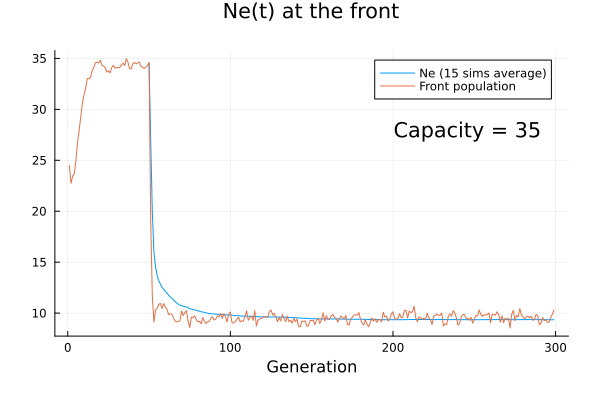

In [30]:
Plots.plot(N_e_av_cuml_front_set1[2:end],xlabel="Generation",title="Ne(t) at the front",yformatter=:plain,label="Ne ($n_res sims average)")
Plots.plot!(popsavavfront_ort[2:end],label="Front population")
Plots.annotate!(290,28,Plots.text("Capacity = $(re_ort["stats"]["capacity"])", :black, :right, 14))

In [31]:
nucl_div_front_set1 = 4*re_ort["stats"]["mut_rate"]*N_e_front_set1
mean(nucl_div_front_set1)

37.303818f0

In [32]:
F_ST_front_set1 = [1/(k+1) for k in nucl_div_front_set1]
mean(F_ST_front_set1)

0.026116524f0

---

In [13]:
#= @everywhere include("resk.jl")

test, time = @timed rangeexp_sphere(50,250,15; r_max_burnin=3, r_max_exp=50, y_max=6,
        data_to_generate="FPSN",capacity=35, prolif_rate=1.8, n_loci=1000,
        n_sel_loci=312, mut_rate=1,migr_rate=0.145,sel_coef=0.01,bottleneck=NaN,migr_mode="diag1/2")
serialize("data/3dan_sph_half.re", test)
println(time) =#

In [34]:
re_ort2 = deserialize("data/2dan_strip_ort_old.re")
re_half2 = deserialize("data/2dan_strip_half_old.re")
re_all2 = deserialize("data/2dan_strip_all_old.re")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … NaN 0.0; … ; NaN NaN … NaN Na…
  "pops"  => Float32[77.0 65.0 … 56.0 41.0; 57.0 59.0 … NaN 60.0; … ; NaN NaN ……
  "aasel" => Float32[312.0 312.0 … 312.0 312.0; 312.0 312.0 … NaN 312.0; … ; Na…
  "fitn"  => Float32[1.0 1.0 … 1.0 1.0; 1.0 1.0 … NaN 1.0; … ; NaN NaN … NaN Na…
  "aaneu" => Float32[688.0 688.0 … 688.0 688.0; 688.0 688.0 … NaN 688.0; … ; Na…
  "Aasel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … NaN 0.0; … ; NaN NaN … NaN Na…
  "Aaneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … NaN 0.0; … ; NaN NaN … NaN Na…
  "AAneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … NaN 0.0; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("n_sel_loci"=>312, "wlddim"=>2, "max_burnin"=>(3…

In [35]:
#popsfront_ort = front_array(re_ort,"pops";oneside=true)
popsavfront_ort2 = average_front(re_ort2,"pops";oneside=true)
popsavavfront_ort2 = average_ts(popsavfront_ort2, re_ort2["stats"]["n_gens"])

300-element Vector{Float32}:
 45.51334
 39.406666
 36.64
 35.646667
 34.579998
 34.879997
 34.77333
 34.713333
 34.186665
 34.539997
  ⋮
  9.080001
  7.4466662
  7.94
  7.6
  8.866668
  9.693334
  8.786666
  9.853333
  8.573333

In [36]:
N_e_front_set2 = [harmmean(popsavfront_ort2[expan_range,k]) for k in 1:n_res]

15-element Vector{Float32}:
 8.013731
 7.7142086
 7.865818
 8.385911
 8.007394
 8.007937
 7.9122577
 8.184951
 7.6946454
 8.04818
 7.8511
 8.247278
 7.9056377
 8.1348295
 7.7675962

In [37]:
N_e_av_cuml_front_set2 = fill(NaN, re_ort2["stats"]["n_gens_burnin"])
for i in expan_range
    push!(N_e_av_cuml_front_set2,mean([harmmean(popsavfront_ort2[(re_ort2["stats"]["n_gens_burnin"]):i,k]) for k in 1:n_res]))
end

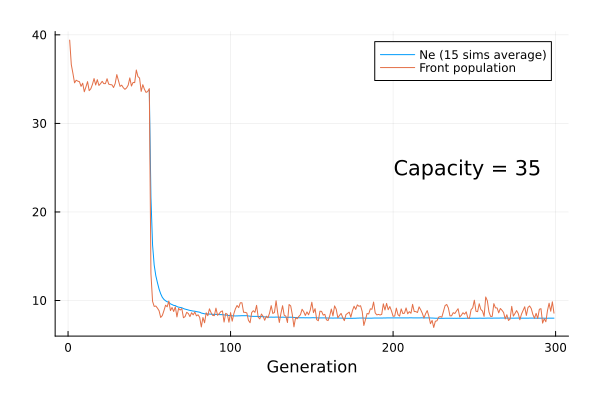

In [38]:
Plots.plot(N_e_av_cuml_front_set2[2:end],xlabel="Generation",title="",yformatter=:plain,label="Ne ($n_res sims average)")
Plots.plot!(popsavavfront_ort2[2:end],label="Front population")
Plots.annotate!(290,25,Plots.text("Capacity = $(re_ort2["stats"]["capacity"])", :black, :right, 14))

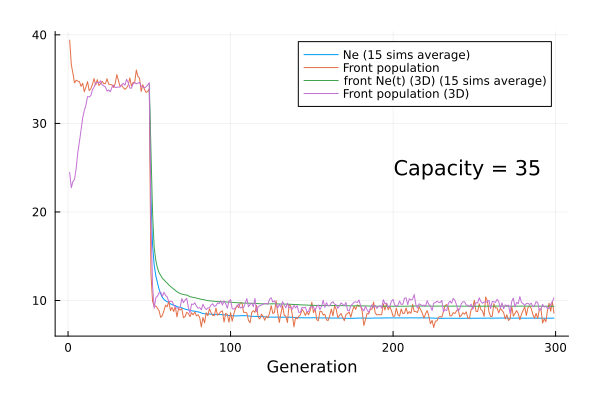

In [39]:
Plots.plot!(N_e_av_cuml_front_set1[2:end],xlabel="Generation",title="",yformatter=:plain,label="front Ne(t) (3D) ($n_res sims average)")
Plots.plot!(popsavavfront_ort[2:end],label="Front population (3D)")

In [40]:
function analyse(re,plustext,col,col2)
    #popsfront_ort = front_array(re_ort,"pops";oneside=true)
    avfront = average_front(re,"pops";oneside=true)
    avavfront = average_ts(avfront, re["stats"]["n_gens"])
    N_e_cumfrset = fill(NaN, re["stats"]["n_gens_burnin"])
    for i in expan_range
        push!(N_e_cumfrset,mean([harmmean(avfront[(re["stats"]["n_gens_burnin"]):i,k]) for k in 1:n_res]))
    end
    Plots.plot!(N_e_cumfrset[2:end],xlabel="Generation",title="",yformatter=:plain,label="Ne ($n_res sims average, $plustext)",color=col)
    Plots.plot!(avavfront[2:end],label="Front population ($n_res sims average, $plustext)",color=col2)
    Plots.annotate!(290,25,Plots.text("Capacity = $(re["stats"]["capacity"])", :black, :right, 14))
end

analyse (generic function with 1 method)

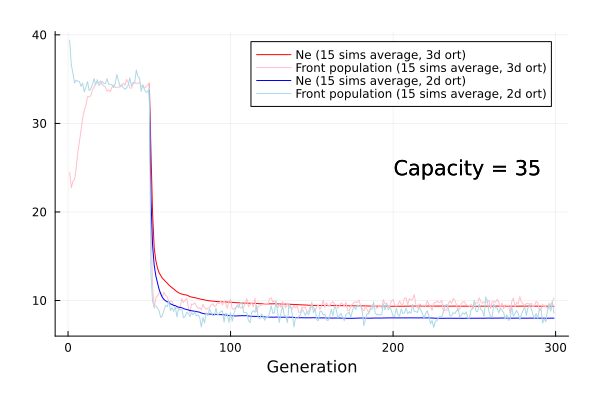

In [41]:
Plots.plot()
analyse(re_ort,"3d ort",:red,:pink)
analyse(re_ort2,"2d ort",:blue,:lightblue)

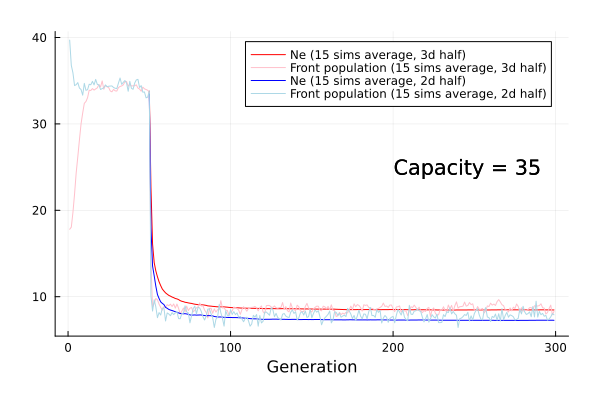

In [42]:
Plots.plot()
analyse(re_half,"3d half",:red,:pink)
analyse(re_half2,"2d half",:blue,:lightblue)

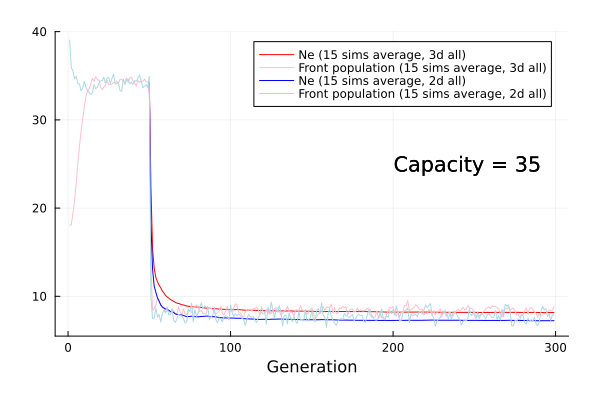

In [43]:
Plots.plot()
analyse(re_all,"3d all",:red,:pink)
analyse(re_all2,"2d all",:blue,:lightblue)

(0.598956f0, 1.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_0NIDAvArgx.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_0NIDAvArgx.gif")
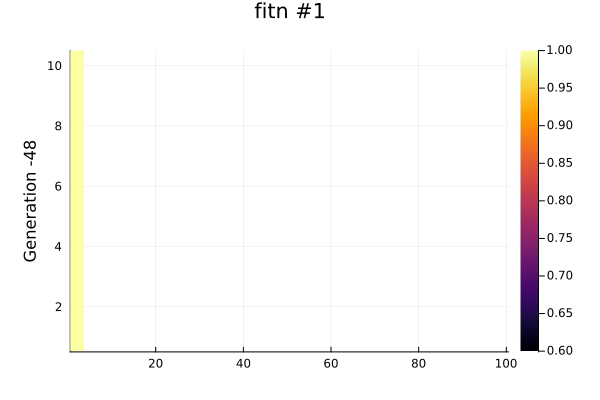

In [44]:
re_heatmap(re_ort2,"fitn")